In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,12)

In [2]:

import pandas as pd
#import BRFSS 2010 data and select columns of interest
df2=pd.read_csv('10.csv')
df2.shape
df2=df2[['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLAN', 'POORHLTH', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'QLREST2', 'EXERANY2', 'DIABETE2', 'QLACTLM2', 'SMOKDAY2', 'AGE', 'HISPANC2', 'VETERAN2', 'MARITAL', 'EDUCA', 'EMPLOY', 'WEIGHT2', 'INCOME2', 'SEX', 'DRNKANY4', 'EMTSUPRT', 'LSATISFY', 'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'SLEPTIME', 'ADPLEASR','ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK','ADMOVE',      'ADANXEV', 'ADDEPEV']]


In [3]:
#descriptive statistics
df2.describe().T


,count,mean,std,min,25%,50%,75%,max
GENHLTH,451068.0,2.618505,1.163590,1.0,2.0,3.0,3.0,9.0
PHYSHLTH,451069.0,60.513775,37.008804,1.0,15.0,88.0,88.0,99.0
MENTHLTH,451071.0,64.469538,35.868508,1.0,28.0,88.0,88.0,99.0
HLTHPLAN,451072.0,1.124619,0.470611,1.0,1.0,1.0,1.0,9.0
POORHLTH,235366.0,56.445940,37.895280,1.0,14.0,88.0,88.0,99.0
PERSDOC2,451072.0,1.349510,0.763039,1.0,1.0,1.0,1.0,9.0
MEDCOST,451073.0,1.895964,0.429873,1.0,2.0,2.0,2.0,9.0
CHECKUP1,451073.0,1.599346,1.249452,1.0,1.0,1.0,2.0,9.0
QLREST2,451072.0,41.332650,37.626869,1.0,5.0,25.0,88.0,99.0
EXERANY2,451073.0,1.283132,0.507188,1.0,1.0,1.0,2.0,9.0


In [4]:
#shape of dataframe
df2.shape

(451075, 40)

In [5]:
#column names
df2.columns

Index(['GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'HLTHPLAN', 'POORHLTH', 'PERSDOC2',
       'MEDCOST', 'CHECKUP1', 'QLREST2', 'EXERANY2', 'DIABETE2', 'QLACTLM2',
       'SMOKDAY2', 'AGE', 'HISPANC2', 'VETERAN2', 'MARITAL', 'EDUCA', 'EMPLOY',
       'WEIGHT2', 'INCOME2', 'SEX', 'DRNKANY4', 'EMTSUPRT', 'LSATISFY',
       'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'SLEPTIME', 'ADPLEASR',
       'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK',
       'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [6]:
#get unique values for each variable

In [7]:
df2.PHYSHLTH.unique()


array([ 3., 30., 88.,  2., 10.,  4., 28.,  5.,  7., 77.,  1., 20.,  9.,
        6., 15., 14., 99., 18., 21., 29., 25., nan, 16., 26., 27.,  8.,
       23., 12., 17., 22., 19., 11., 24., 13.])

In [8]:

df2.EMTSUPRT.unique()

array([ 5., nan,  1.,  2.,  3.,  7.,  4.,  9.])

In [9]:
df2['LSATISFY'].unique()
       

array([ 1., nan,  2.,  3.,  4.,  7.,  9.])

In [10]:
df2['PAINACT2'].unique()

array([nan,  3., 88., 14.,  5., 10., 25., 30., 15.,  2.,  4., 20.,  1.,
        7., 29., 77.,  6., 27.,  8., 28., 17.,  9., 21., 12., 99., 18.,
       24.])

In [11]:
df2['QLMENTL2'].unique()

array([nan, 88., 14., 10.,  5.,  2., 77.,  3.,  7.,  1., 20., 99., 15.,
        4., 30.,  6., 25., 29., 12., 18., 19., 28., 21.,  8., 16., 11.,
       23.,  9., 26.])

In [12]:
df2['QLSTRES2'].unique()

array([nan,  2., 88., 14., 10.,  5.,  4., 77.,  1., 30., 15.,  7.,  6.,
       28.,  3., 25., 12., 20.,  8., 29., 99., 22., 21., 16., 18.,  9.,
       13., 26., 27., 11.])

In [13]:
df2['QLHLTH2'].unique()

array([nan, 77., 30., 14., 20., 10., 15., 88., 25.,  6., 18., 28.,  5.,
        4., 23., 27.,  1.,  7.,  2.,  8.,  3., 26., 12., 24., 17., 29.,
       16., 22., 99., 11., 21.])

In [14]:
df2['SLEPTIME'].unique()

array([nan,  8.,  9.,  7.,  6., 10., 99., 77.,  5., 12.,  4.,  3., 15.,
       11.,  2.,  1., 20., 18., 14., 16., 17., 13., 21., 24.])

In [15]:
df2['ADPLEASR'].unique()

array([nan, 88.,  1.,  8.,  2., 14.,  7., 77., 10.,  3.,  4.,  5., 99.,
       12.,  6.,  9., 11., 13.])

In [16]:
df2['ADDOWN'].unique()

array([nan, 88.,  1., 14.,  3.,  4.,  2., 10.,  5.,  8., 77.,  7.,  6.,
       99.,  9., 12., 13., 11.])

In [17]:
df2['ADSLEEP'].unique()

array([nan,  1., 88.,  4.,  2., 10.,  5.,  3.,  9., 14., 99.,  7., 77.,
        6., 12., 13.,  8., 11.])

In [18]:
df2['ADENERGY'].unique()

array([nan,  1.,  3., 88.,  6.,  2.,  5.,  7.,  4., 14.,  8., 13., 10.,
       77., 99., 12.,  9., 11.])

In [19]:
df2['ADEAT1'].unique()

array([nan,  2., 88.,  3.,  1.,  7., 10.,  4., 14.,  5.,  8.,  6., 99.,
       77., 12.,  9., 11., 13.])

In [20]:
df2['ADFAIL'].unique()

array([nan, 88.,  7.,  3.,  1., 14.,  2., 10.,  9.,  8., 12., 77.,  5.,
        4., 99.,  6., 13., 11.])

In [21]:
df2['ADTHINK'].unique()

array([nan, 88.,  4., 10.,  2.,  1.,  6.,  3., 14.,  5., 12.,  7., 77.,
       99.,  8., 13., 11.,  9.])

In [22]:
df2['ADMOVE'].unique()

array([nan, 88., 10., 14.,  2.,  1., 77.,  7.,  4.,  5.,  6., 99.,  3.,
        8., 12.,  9., 11., 13.])

In [23]:
df2['ADANXEV'].unique()

array([nan,  2.,  1.,  9.,  7.])

In [24]:
df2['ADDEPEV'].unique()

array([nan,  2.,  1.,  9.,  7.])

In [25]:
#create a separate df with mental health related variables
mental_health=df2[['EMTSUPRT', 'LSATISFY', 'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2', 'SLEPTIME', 'ADPLEASR','ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1', 'ADFAIL', 'ADTHINK','ADMOVE', 'ADANXEV', 'ADDEPEV']]
mental_health.describe()


,EMTSUPRT,LSATISFY,PAINACT2,QLMENTL2,QLSTRES2,QLHLTH2,SLEPTIME,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,ADANXEV,ADDEPEV
count,436221.000000,435968.000000,4211.000000,4211.000000,4210.000000,4210.000000,47262.000000,79466.000000,79420.000000,79391.000000,79367.000000,79335.000000,79298.000000,79266.000000,79219.000000,79160.000000,79104.000000
mean,1.974605,1.688021,66.472334,56.459986,44.654394,31.624466,7.968918,61.909974,65.177739,50.676638,36.939232,59.207676,74.269868,73.963553,79.497684,1.892724,1.843459
std,1.444904,0.973586,34.255071,39.480763,39.617811,23.990976,8.091701,38.298421,37.122756,40.693882,39.828500,39.124483,30.735371,30.872160,24.815877,0.513281,0.528095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,30.000000,5.000000,4.000000,20.000000,6.000000,10.000000,14.000000,5.000000,3.000000,8.000000,88.000000,88.000000,88.000000,2.000000,2.000000
50%,1.000000,2.000000,88.000000,88.000000,30.000000,28.000000,7.000000,88.000000,88.000000,88.000000,14.000000,88.000000,88.000000,88.000000,88.000000,2.000000,2.000000
75%,2.000000,2.000000,88.000000,88.000000,88.000000,30.000000,8.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,2.000000,2.000000
max,9.000000,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.000000,9.000000


In [26]:
#88 represents 'None', so replace with 0 for all applicable columns
import numpy as np
mental_health.describe()
mental_health.ADPLEASR.unique()
cols=list(mental_health.columns)
cols
mental_health['PAINACT2'].replace(to_replace=88., value=0, inplace=True)
mental_health['QLMENTL2'].replace(to_replace=88., value=0, inplace=True)
mental_health['QLSTRES2'].replace(to_replace=88., value=0, inplace=True)
mental_health['QLHLTH2'].replace(to_replace=88., value=0, inplace=True)
mental_health['SLEPTIME'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADPLEASR'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADDOWN'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADSLEEP'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADENERGY'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADEAT1'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADFAIL'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADTHINK'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADMOVE'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADANXEV'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADFAIL'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADTHINK'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADMOVE'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADANXEV'].replace(to_replace=88., value=0, inplace=True)
mental_health['ADDEPEV'].replace(to_replace=88., value=0, inplace=True)

mental_health.EMTSUPRT.unique()
mental_health.LSATISFY.unique()



C:\Users\meagv\.conda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


array([ 1., nan,  2.,  3.,  4.,  7.,  9.])

In [27]:
mental_health.columns


Index(['EMTSUPRT', 'LSATISFY', 'PAINACT2', 'QLMENTL2', 'QLSTRES2', 'QLHLTH2',
       'SLEPTIME', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1',
       'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [28]:
#display number of missing values
nas=pd.DataFrame(mental_health.isnull().sum().sort_values(ascending=False),columns = ['Missing'])
pos = nas['Missing'] > 0
nas[pos]
mental_health2=mental_health[['EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY', 'ADEAT1',
       'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV']]
mental_health2.dropna(inplace=True)
mental_health2

nas=pd.DataFrame(mental_health2.isnull().sum().sort_values(ascending=False),columns = ['Missing'])
pos = nas['Missing'] > 0
nas[pos]


C:\Users\meagv\.conda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Missing


In [29]:

mental_health2.describe()

,EMTSUPRT,LSATISFY,ADPLEASR,ADDOWN,ADSLEEP,ADENERGY,ADEAT1,ADFAIL,ADTHINK,ADMOVE,ADANXEV,ADDEPEV
count,79100.000000,79100.000000,79100.000000,79100.000000,79100.000000,79100.000000,79100.000000,79100.000000,79100.000000,79100.000000,79100.000000,79100.000000
mean,1.934501,1.642579,4.272023,2.136915,4.109254,5.085954,3.375689,1.757206,1.916043,2.127636,1.892453,1.843477
std,1.355942,0.806905,14.460193,8.600559,10.443834,11.027725,10.560381,8.737672,8.931401,11.069452,0.511861,0.528090
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000,1.000000,4.000000,6.000000,3.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,9.000000,9.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,9.000000,9.000000


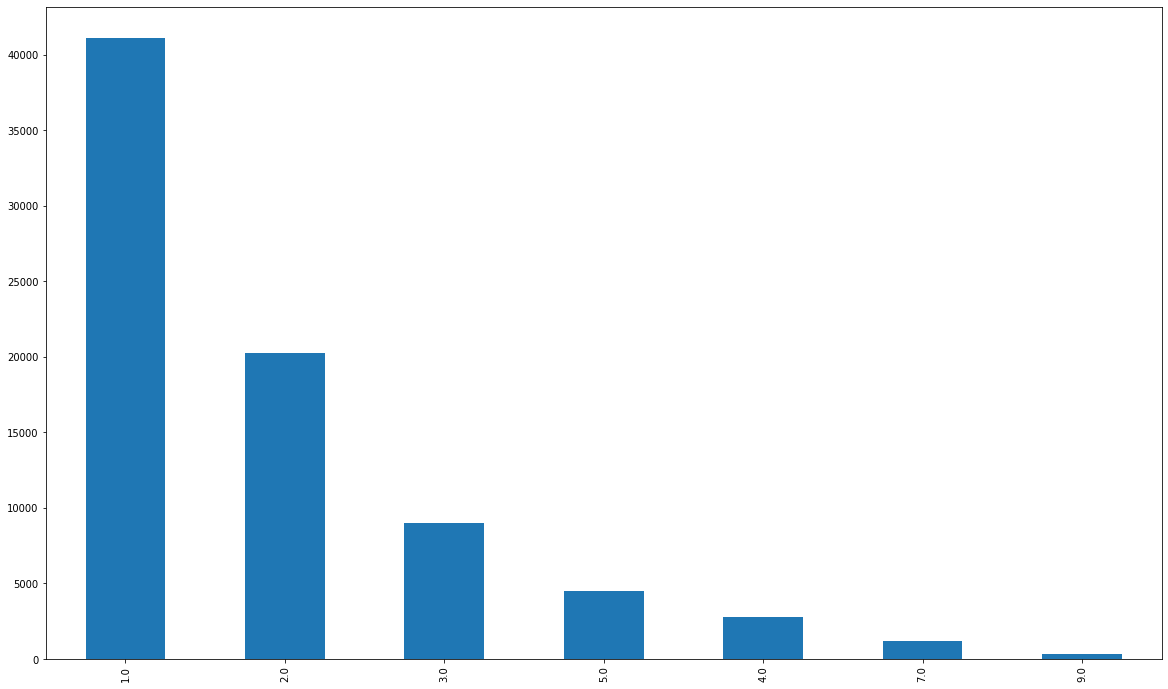

In [30]:
#work with categorical EDA Bar Charts
mental_health2['EMTSUPRT'].value_counts().plot(kind='bar')


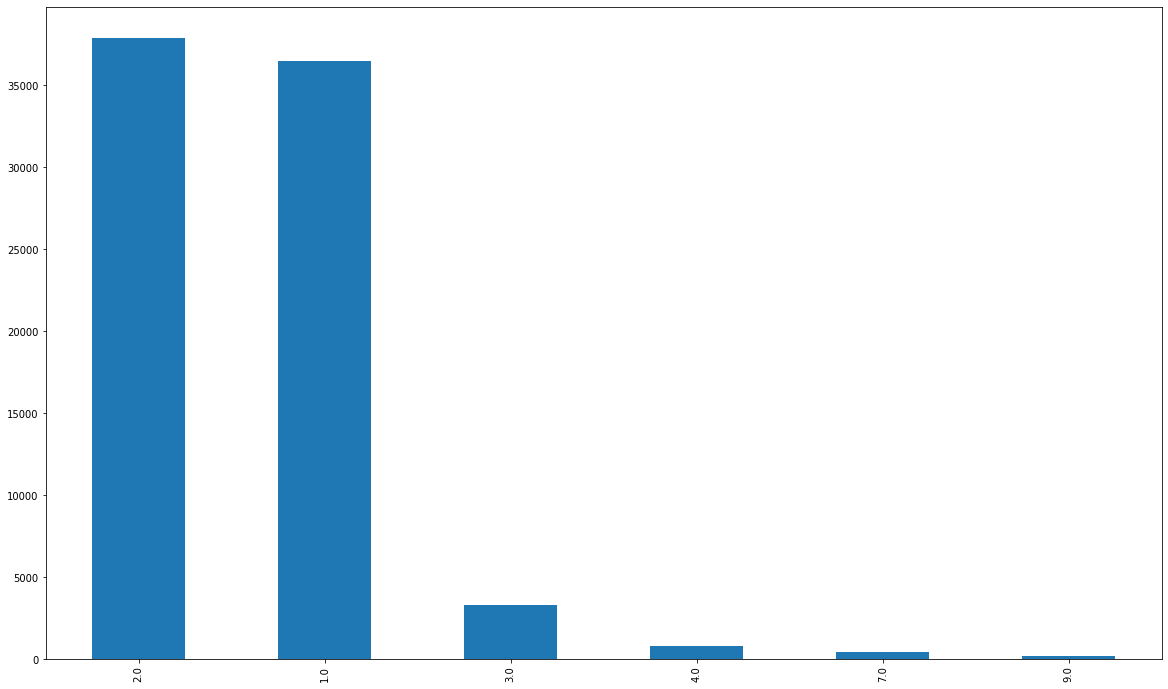

In [31]:
#work with df2 for categorical EDA
mental_health2['LSATISFY'].value_counts().plot(kind='bar')

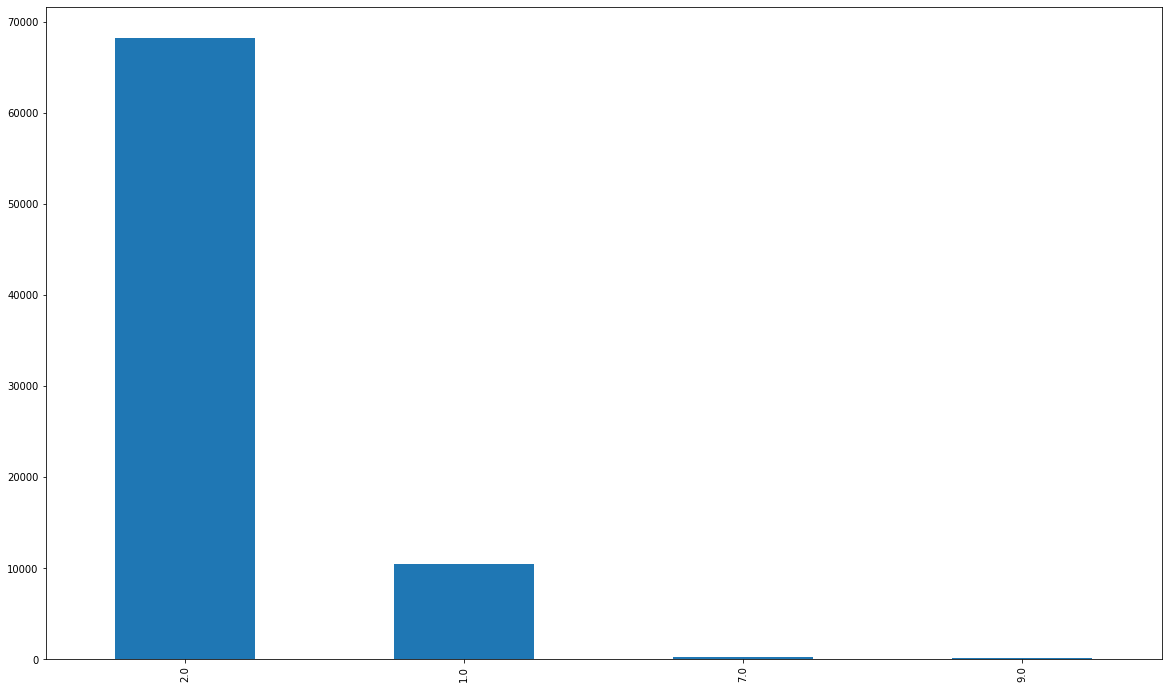

In [32]:
mental_health2['ADANXEV'].value_counts().plot(kind='bar')

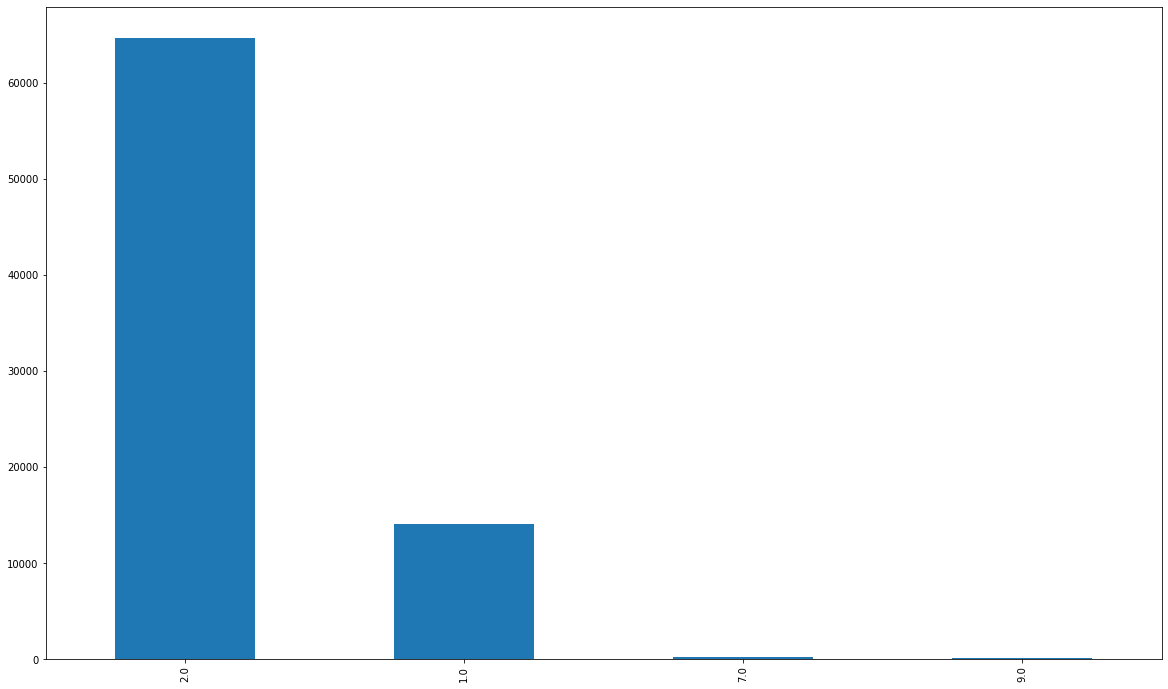

In [33]:
mental_health2['ADDEPEV'].value_counts().plot(kind='bar')

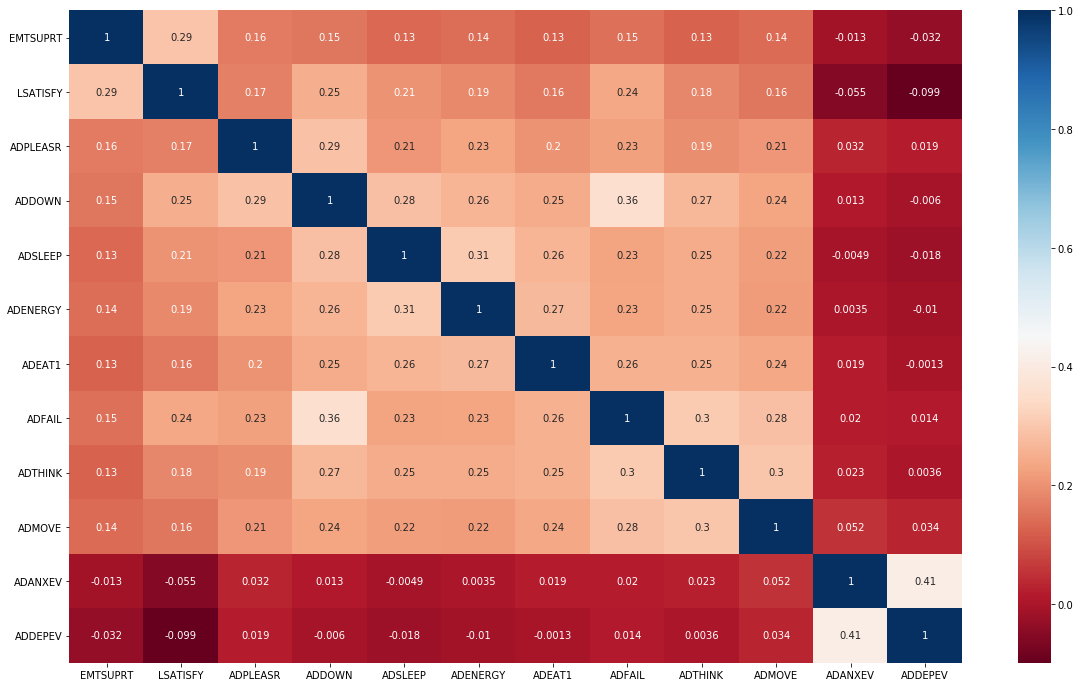

<Figure size 1440x1440 with 0 Axes>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

corrMatrix = mental_health2.corr()
sns.heatmap(corrMatrix, annot=True, cmap='RdBu')
plt.figure(figsize=(20,20))
plt.show()
#focus on the AD items as predictors of ADDEPEV

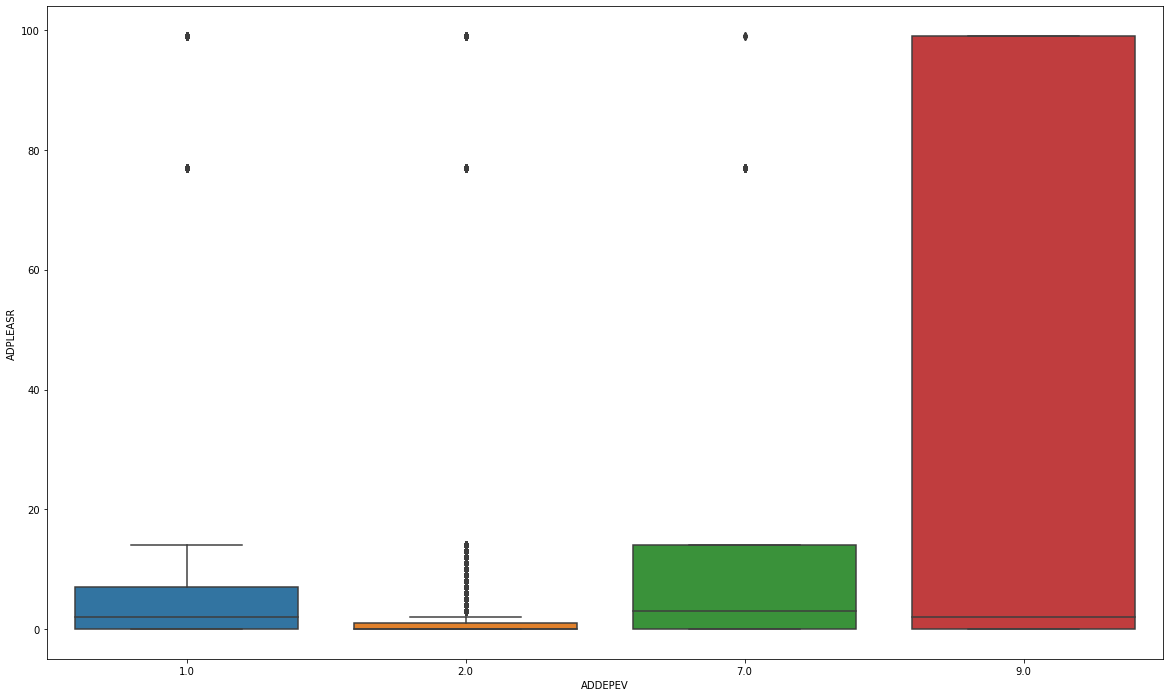

In [35]:
sns.boxplot(data = mental_health2, x='ADDEPEV', y='ADPLEASR')
#people who reported depression had more days with little pleasure


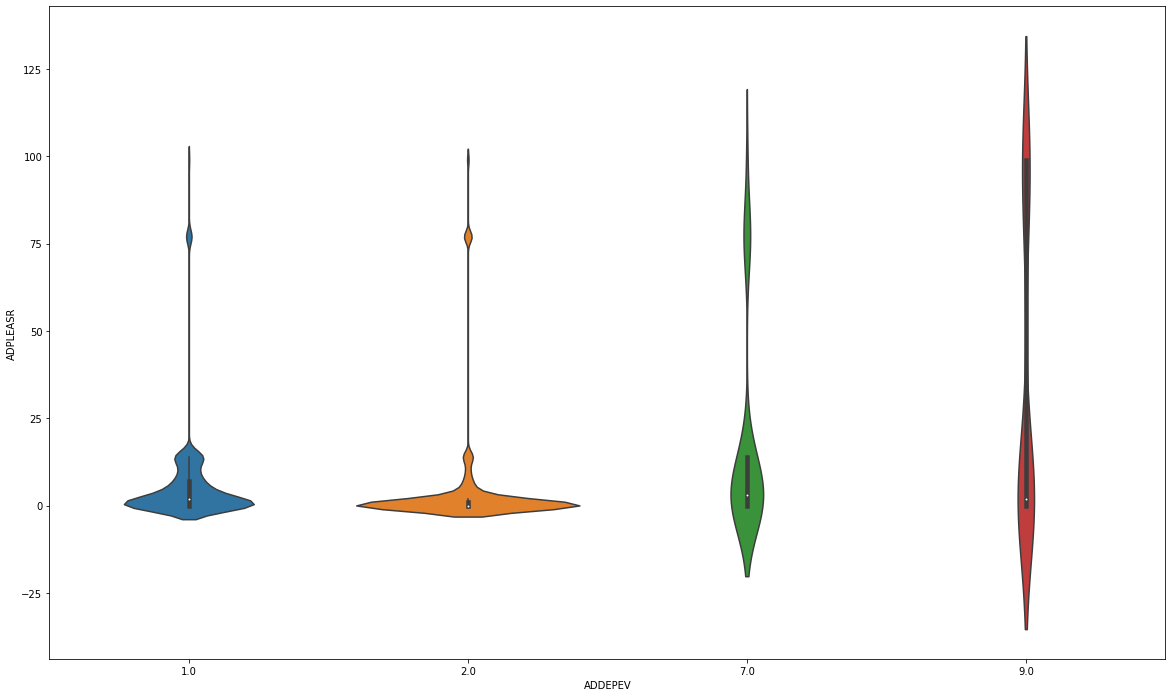

In [36]:
sns.violinplot(data = mental_health2, x='ADDEPEV', y='ADPLEASR')
#most of the people who didn't get diagnosed with depression reported 0 days of little pleasure

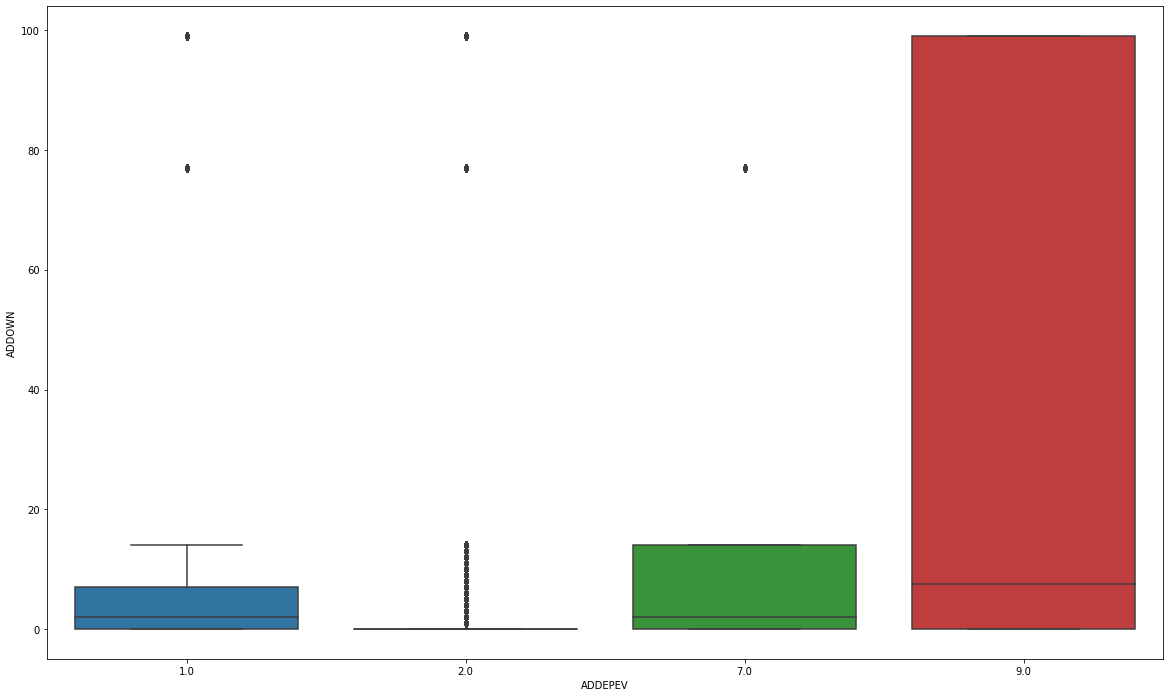

In [37]:
sns.boxplot(data = mental_health2, x='ADDEPEV', y='ADDOWN')
#people who reported depression had more days FEELING DOWN DEPRESSED OR HOPELESS

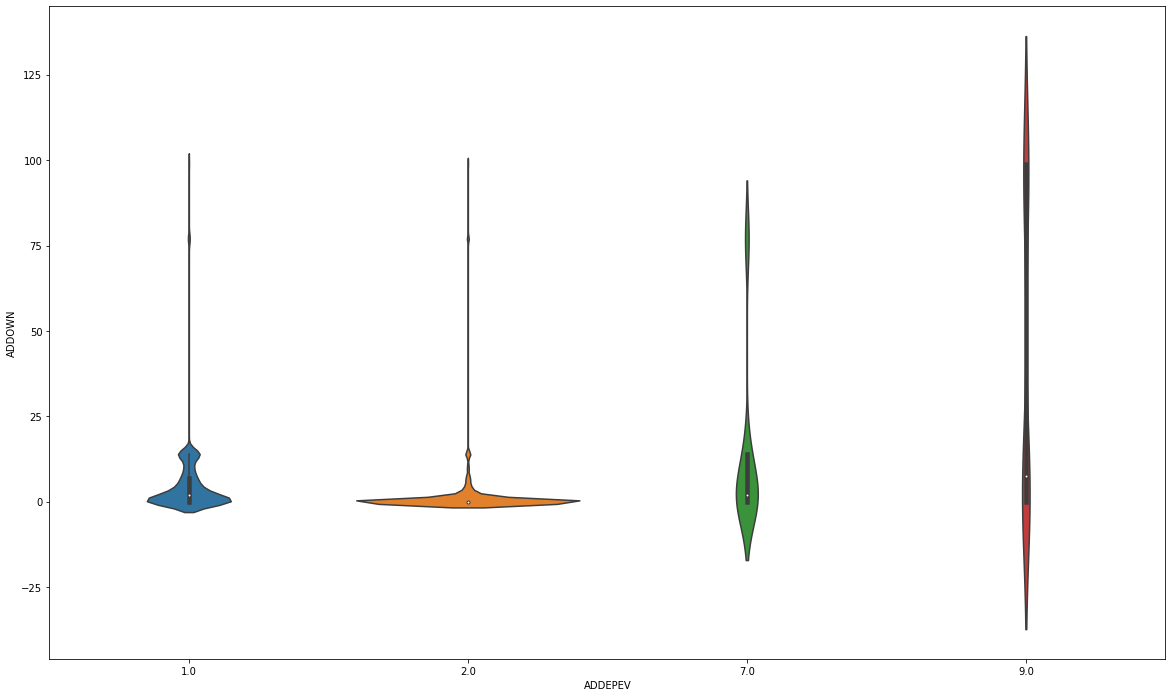

In [38]:
sns.violinplot(data = mental_health2, x='ADDEPEV', y='ADDOWN')
#most of the people who didn't get diagnosed with depression reported 0 days of feeling down, depressed or hopeless

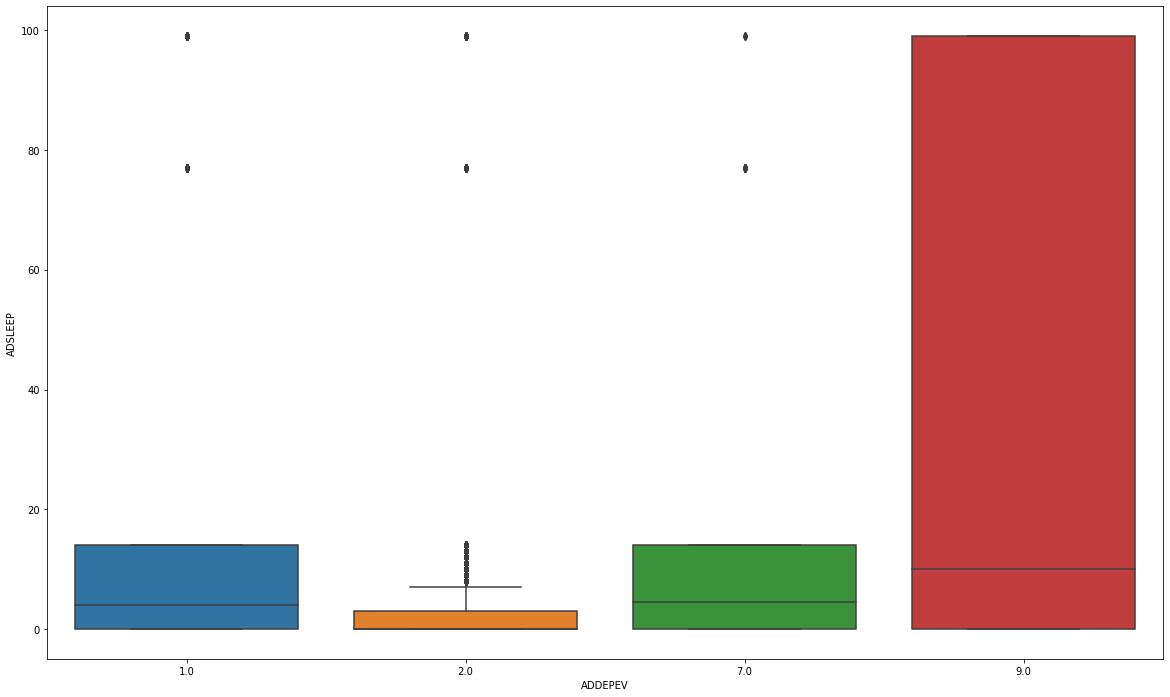

In [39]:
sns.boxplot(data = mental_health2, x='ADDEPEV', y='ADSLEEP')
#people who reported depression had greater variability in sleeping patterns

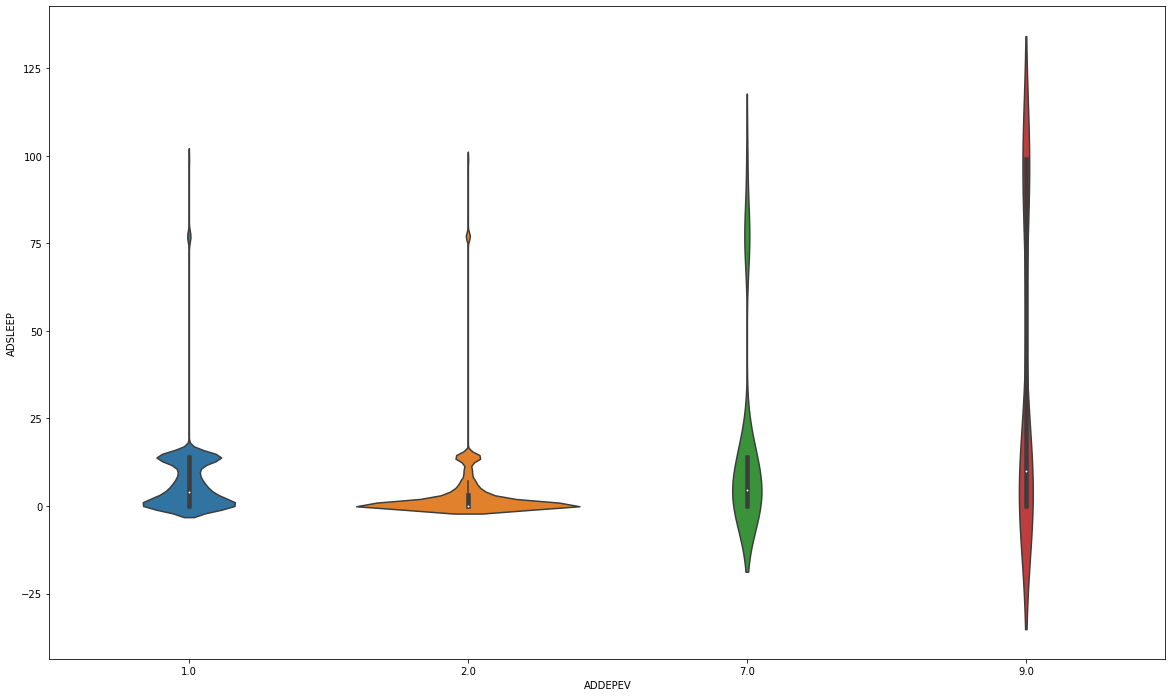

In [40]:
sns.violinplot(data = mental_health2, x='ADDEPEV', y='ADSLEEP')
#answers were more dispersed for those with depression; most people without depression had good sleep

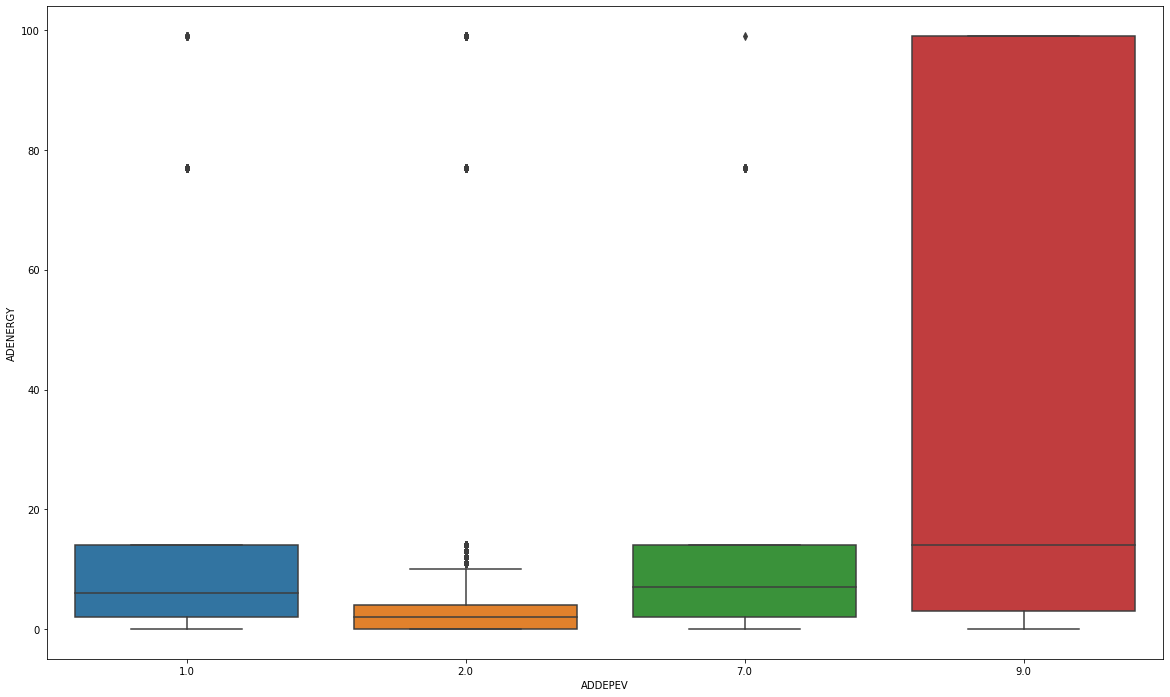

In [41]:
sns.boxplot(data = mental_health2, x='ADDEPEV', y='ADENERGY')
#people who reported depression had more days that they felt tired; people without depression were less tired

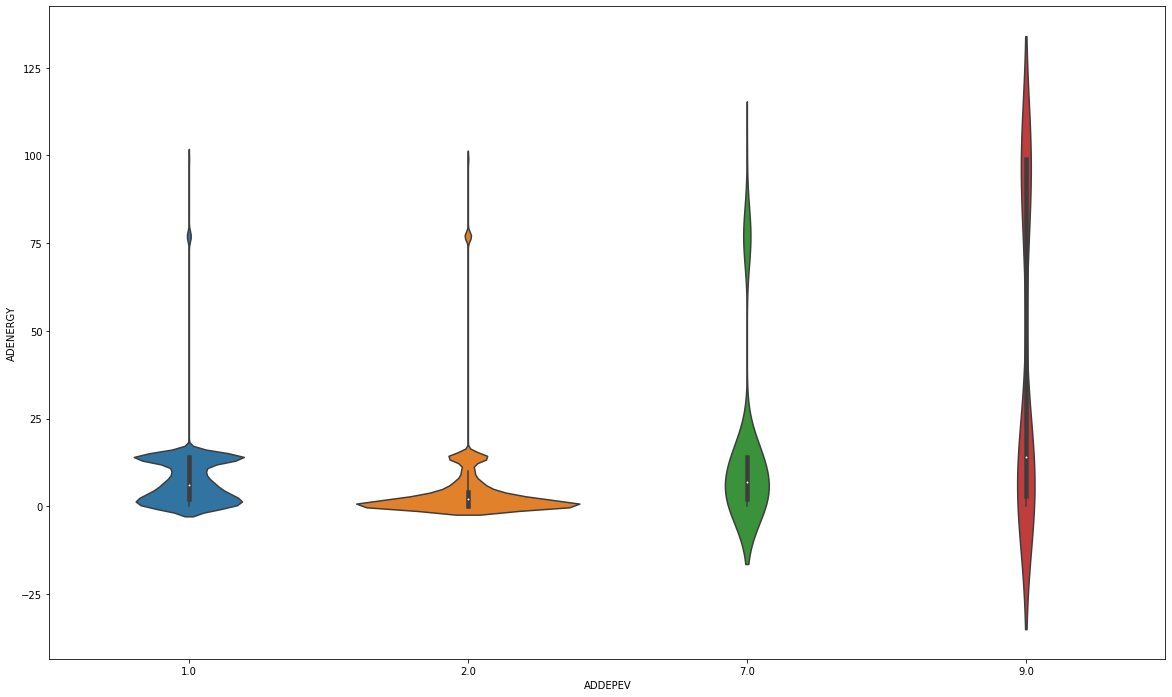

In [42]:
sns.violinplot(data = mental_health2, x='ADDEPEV', y='ADENERGY')
#most people without depression weren't tired, but a large proportion of those depressed had trouble with energy

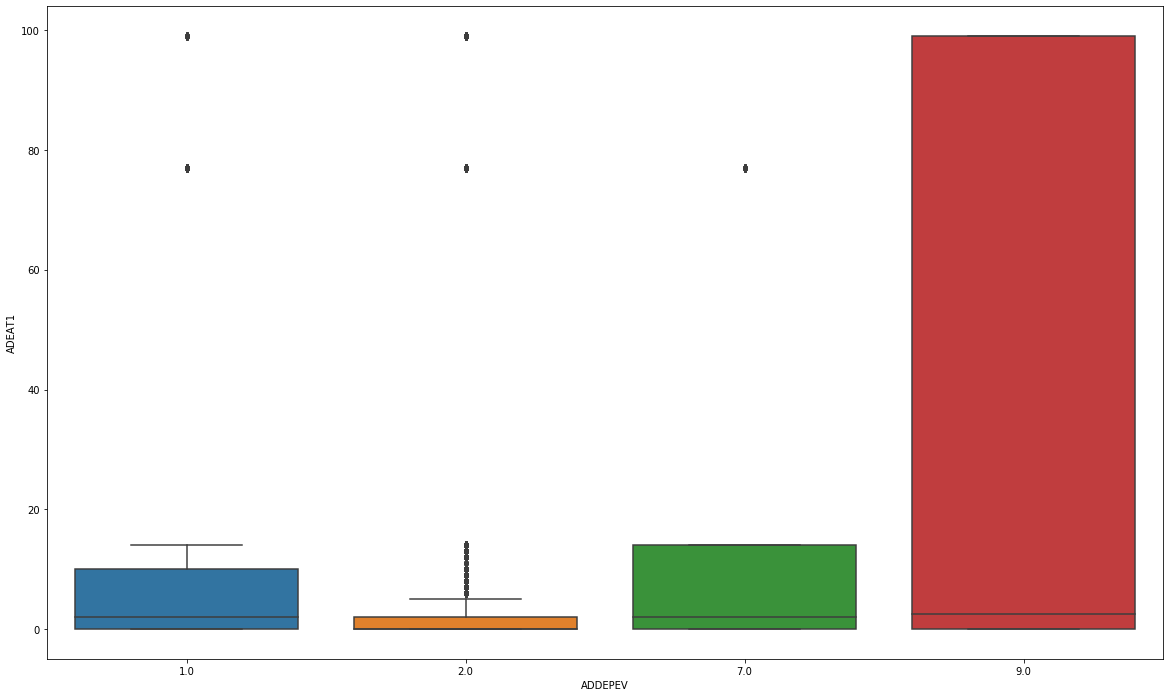

In [43]:
sns.boxplot(data = mental_health2, x='ADDEPEV', y='ADEAT1')
#people who reported depression had more days that they ate too much or too little

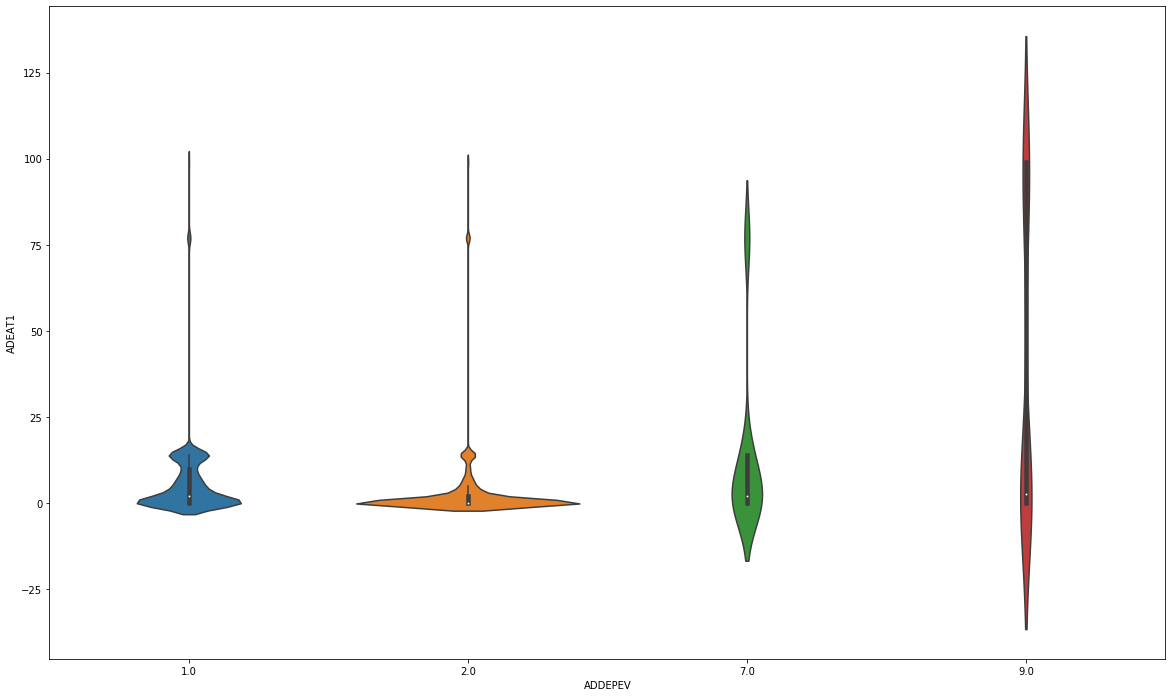

In [44]:
sns.violinplot(data = mental_health2, x='ADDEPEV', y='ADEAT1')
#most people without depression didn't have trouble eating

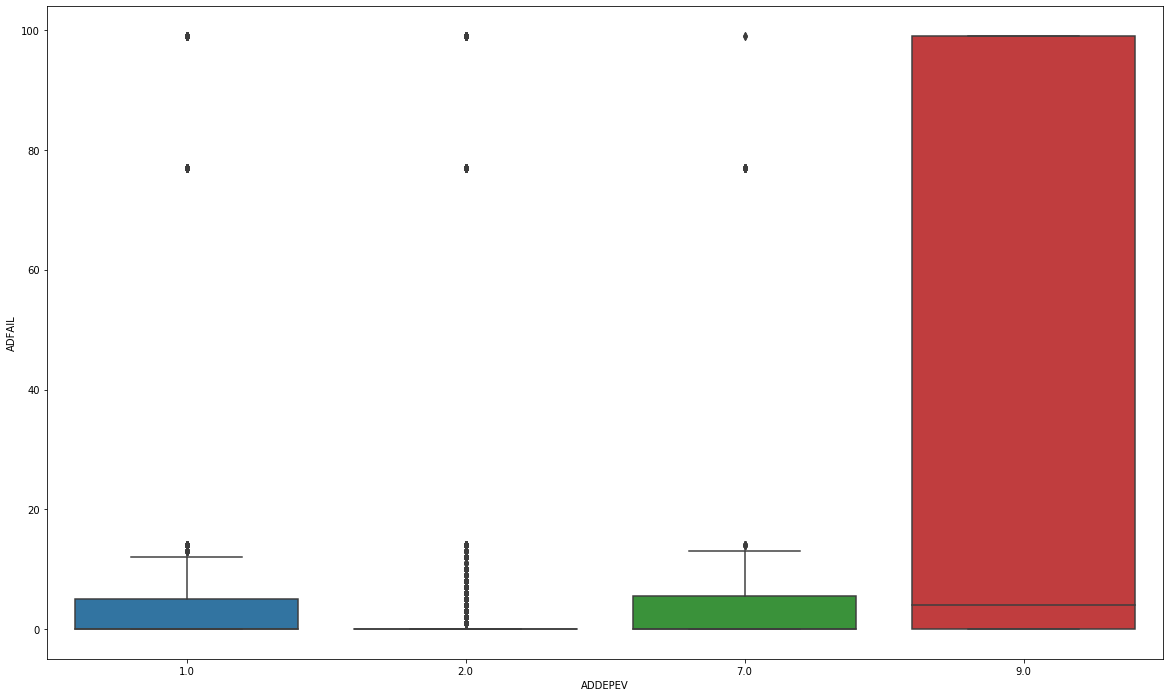

In [45]:
sns.boxplot(data = mental_health2, x='ADDEPEV', y='ADFAIL')
#people who reported depression had more days that they felt like a failure

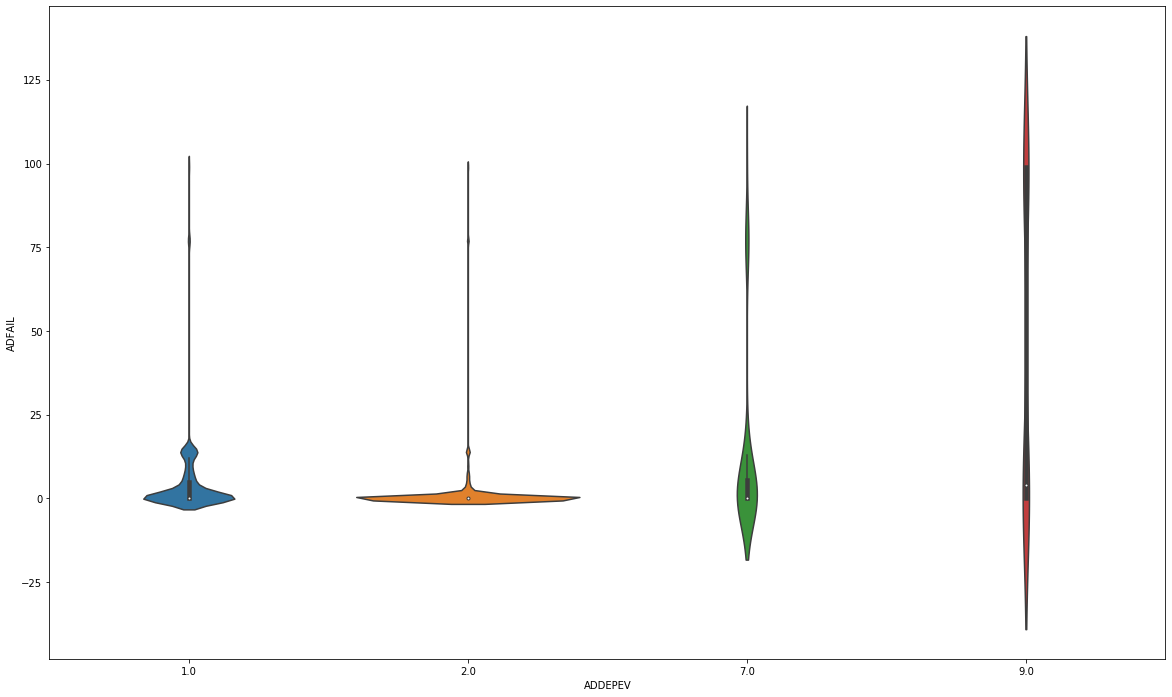

In [46]:
sns.violinplot(data = mental_health2, x='ADDEPEV', y='ADFAIL')
#most people without depression didn't feel like a failure

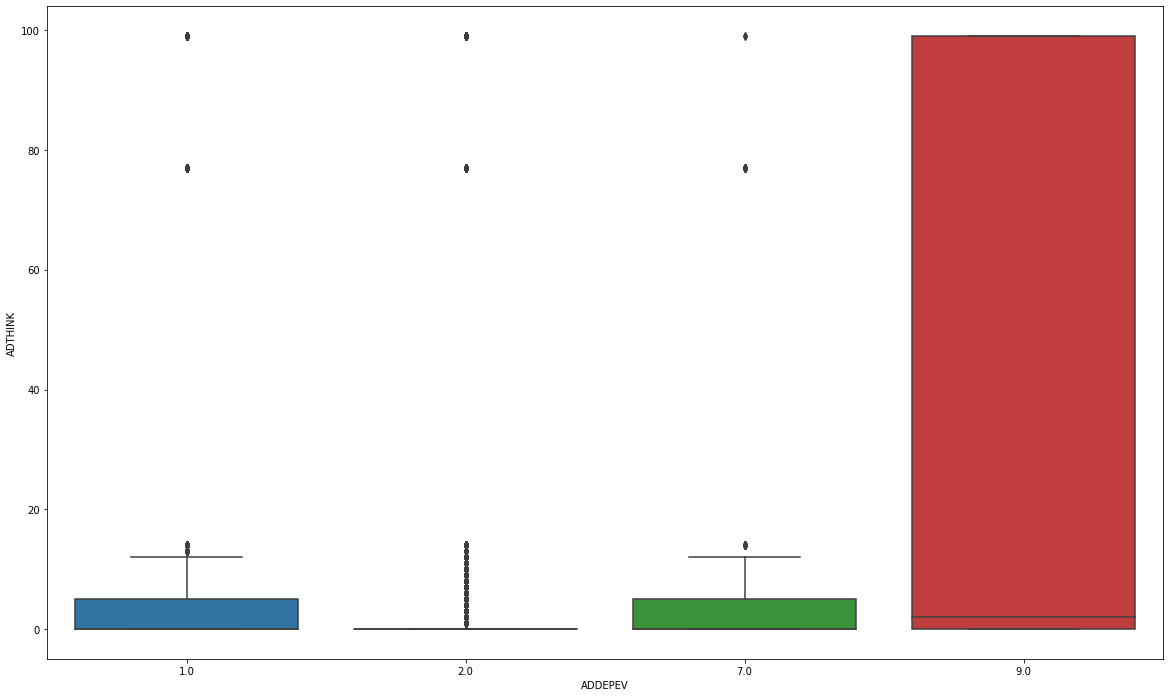

In [47]:
sns.boxplot(data = mental_health2, x='ADDEPEV', y='ADTHINK')
#people who reported depression had more days that they had trouble concentrating

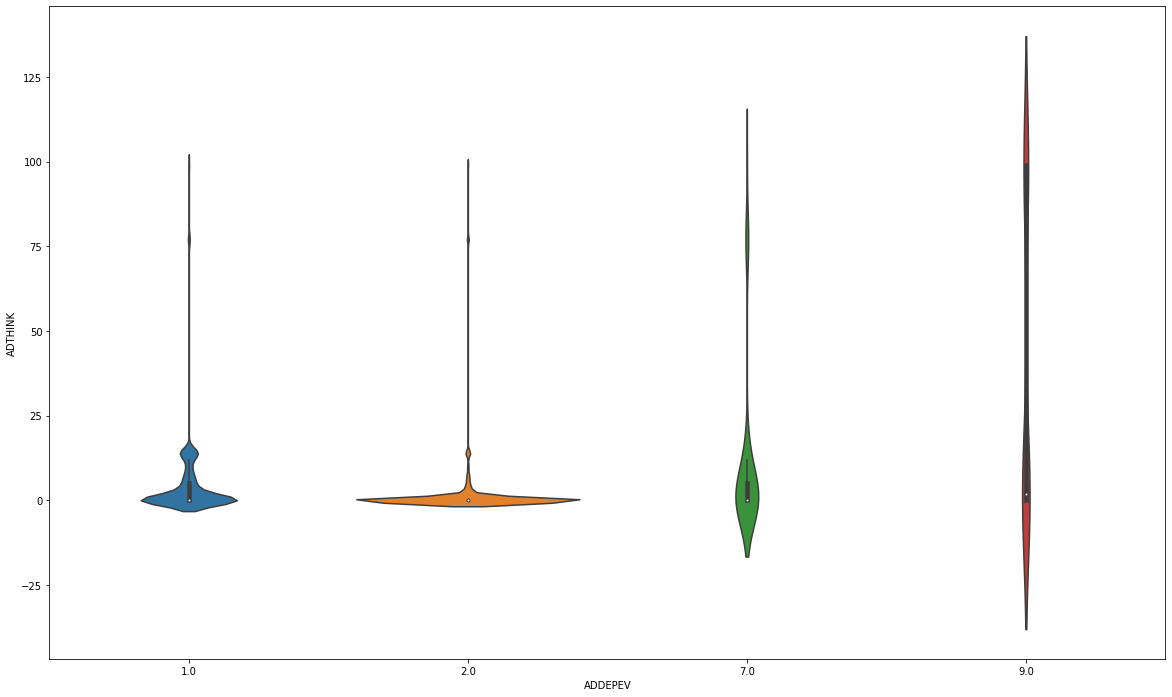

In [48]:
sns.violinplot(data = mental_health2, x='ADDEPEV', y='ADTHINK')
#most people without depression didn't have trouble concentrating

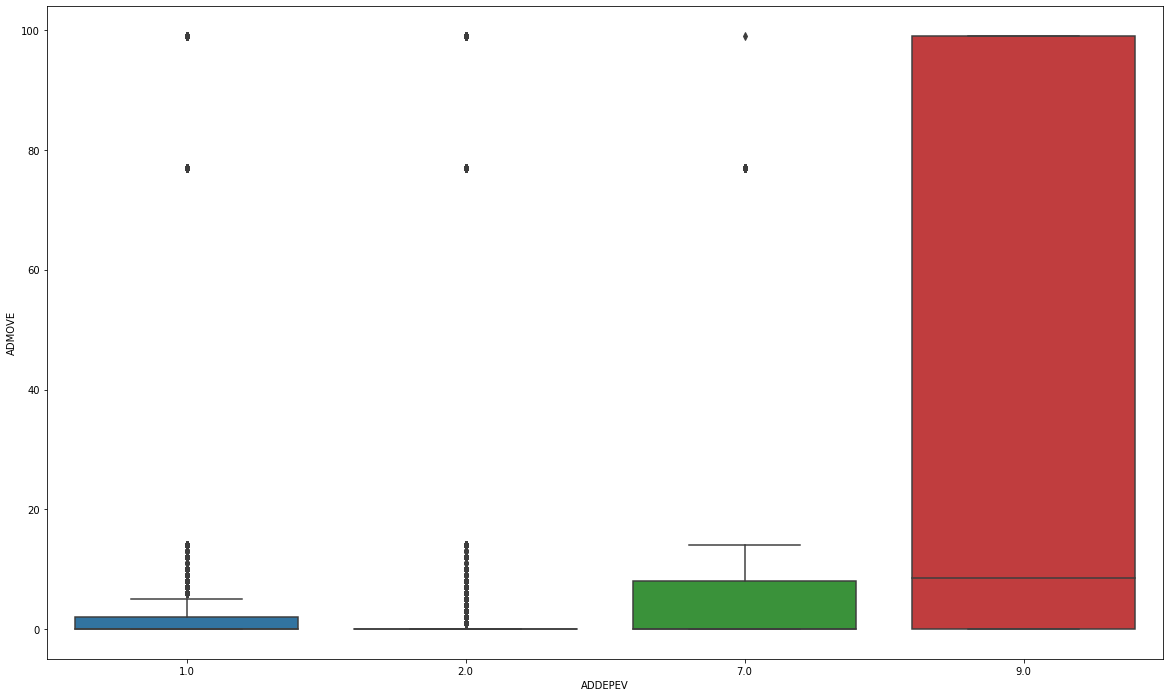

In [49]:
sns.boxplot(data = mental_health2, x='ADDEPEV', y='ADMOVE')
#people who reported depression had more days that they moved too slowly or too quickly

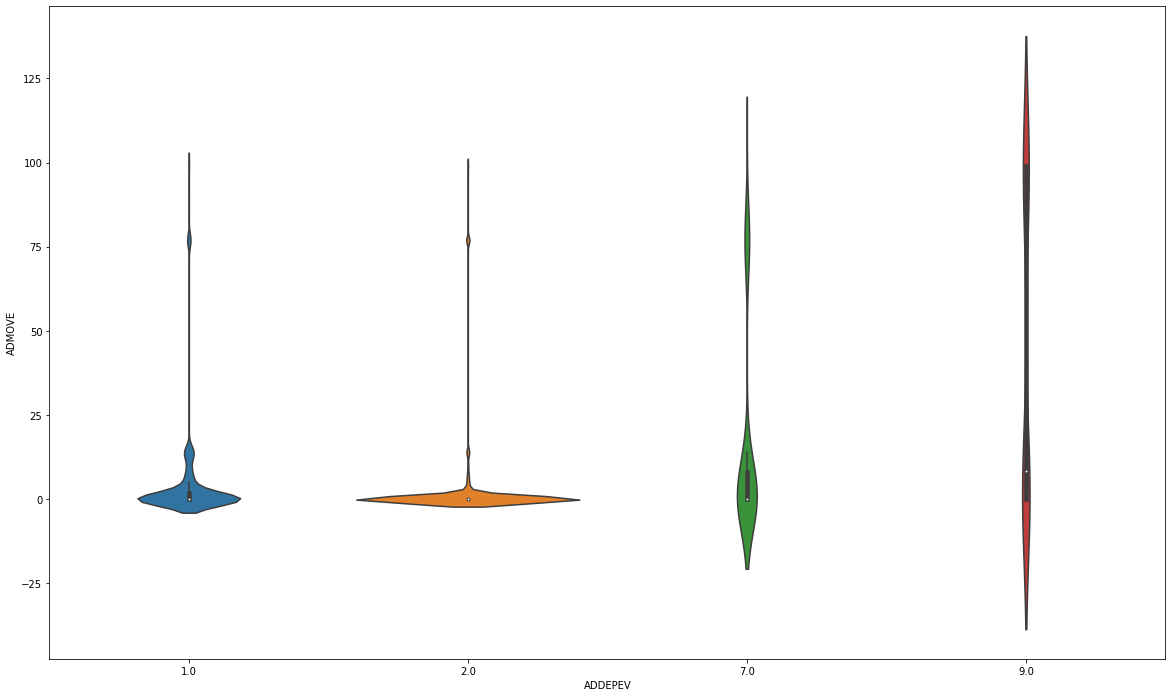

In [50]:
sns.violinplot(data = mental_health2, x='ADDEPEV', y='ADMOVE')
#most people without depression didn't have trouble with moving too slowly or too quickly; depression had more variability

In [51]:
mental_health2.columns

Index(['EMTSUPRT', 'LSATISFY', 'ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY',
       'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'ADANXEV', 'ADDEPEV'],
      dtype='object')

In [66]:
#create categorical dataframe

mhcat=mental_health2[['EMTSUPRT', 'LSATISFY', 'ADANXEV', 'ADDEPEV']]
mhcat.dtypes
mhcat.EMTSUPRT.unique()

array([2., 1., 5., 3., 4., 7., 9.])

In [61]:
mental_health2.dtypes

EMTSUPRT    float64
LSATISFY    float64
ADPLEASR    float64
ADDOWN      float64
ADSLEEP     float64
ADENERGY    float64
ADEAT1      float64
ADFAIL      float64
ADTHINK     float64
ADMOVE      float64
ADANXEV     float64
ADDEPEV     float64
dtype: object

In [62]:
#standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
mh_num=mental_health2[['ADPLEASR', 'ADDOWN', 'ADSLEEP', 'ADENERGY','ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE']]
scaled_mh = scaler.fit_transform(mh_num)
scaled_mh= pd.DataFrame(scaled_mh)
scaled_mh.shape

(79100, 8)

In [63]:
mhcat.shape


(79100, 4)

In [65]:
mental_health=pd.concat([scaled_mh, mhcat], axis=1)
mental_health.head(50)
mental_health.EMTSUPRT.unique()

array([nan,  2.,  1.,  5.,  3.,  4.,  7.,  9.])

In [67]:
mental_health2=pd.get_dummies(mental_health, columns=['EMTSUPRT', 'LSATISFY', 'ADANXEV', 'ADDEPEV'])
mental_health2.head(100)

,0,1,2,3,4,5,6,7,EMTSUPRT_1.0,EMTSUPRT_2.0,...,LSATISFY_7.0,LSATISFY_9.0,ADANXEV_1.0,ADANXEV_2.0,ADANXEV_7.0,ADANXEV_9.0,ADDEPEV_1.0,ADDEPEV_2.0,ADDEPEV_7.0,ADDEPEV_9.0
0,-0.295435,-0.248464,-0.297714,-0.370519,-0.130270,-0.201108,-0.214530,-0.192209,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.226279,-0.132192,-0.297714,-0.189157,-0.319658,-0.201108,-0.214530,-0.192209,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.295435,-0.248464,-0.297714,-0.461200,-0.035576,-0.201108,-0.214530,-0.192209,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.257811,-0.248464,-0.393465,0.082887,-0.319658,-0.201108,-0.214530,-0.192209,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.295435,-0.248464,-0.393465,-0.279838,-0.319658,-0.201108,-0.214530,-0.192209,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.050344,0.332897,-0.010461,0.082887,0.627284,1.401159,0.905122,-0.192209,0,0,...,0,0,0,0,0,0,0,0,0,0
96,-0.295435,0.100353,-0.201963,-0.279838,0.248507,-0.201108,-0.214530,-0.011531,0,0,...,0,0,0,0,0,0,0,0,0,0
97,-0.295435,-0.248464,0.181041,-0.279838,-0.035576,-0.201108,-0.214530,-0.192209,0,0,...,0,0,0,0,0,0,0,0,0,0
98,-0.226279,-0.015919,-0.201963,-0.370519,-0.319658,-0.086660,-0.214530,-0.192209,0,0,...,0,0,0,0,0,0,0,0,0,0
